In [1]:
import pandas as pd

Random Forest - RMSE: 104.61, R²: 0.9968
Gradient Boosting - RMSE: 93.42, R²: 0.9975


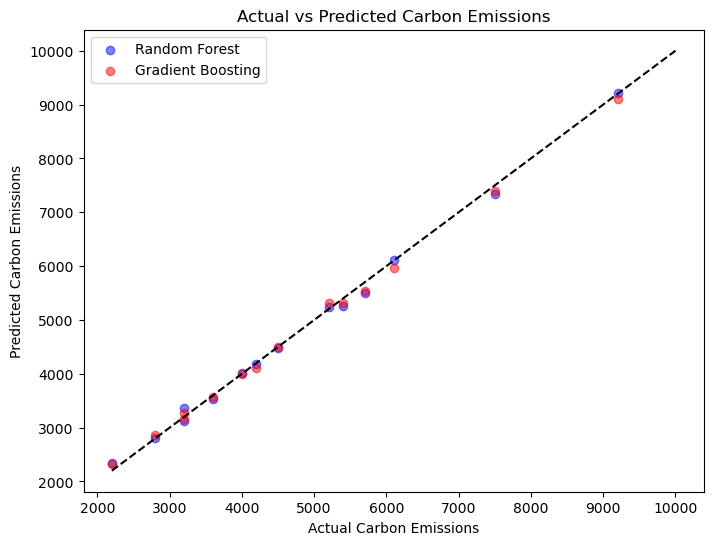

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Data
df = pd.read_csv("carbon_emissions.csv")

# Step 2: Data Preprocessing
# Encode categorical 'Country' column
encoder = LabelEncoder()
df["Country"] = encoder.fit_transform(df["Country"])

# Features and Target Variable
X = df.drop(columns=["Carbon_Emissions"])
y = df["Carbon_Emissions"]

# Split data into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train Models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Step 4: Predictions
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# Step 5: Evaluation
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.4f}")

evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("Gradient Boosting", y_test, gb_pred)

# Step 6: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, label="Random Forest", color='blue', alpha=0.5)
plt.scatter(y_test, gb_pred, label="Gradient Boosting", color='red', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="black")  # Diagonal Line
plt.xlabel("Actual Carbon Emissions")
plt.ylabel("Predicted Carbon Emissions")
plt.legend()
plt.title("Actual vs Predicted Carbon Emissions")
plt.show()
